<a href="https://colab.research.google.com/github/KrutiTaware/Data-Science-Pratical/blob/Master/DS_CA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTING DATASET**

In [ ]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Loading the dataset
df_data=pd.read_csv('/content/drive/MyDrive/Olympic Game_Analysis_Dataset.xlsx - athlete_events (1).csv')
df_data

<ipython-input-4-3ac60b1b5714>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data=pd.read_csv('/content/drive/MyDrive/Olympic Game_Analysis_Dataset.xlsx - athlete_events (1).csv')


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
# Dropping Games columns as it can great noise in the input
df_data = df_data.drop(['Games'],axis = 1)

In [ ]:
# Printing top 5 rows
df = df_data.head(4000)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
# Printing bottom 5 rows
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3995,2302,Pierre Henri Maurice Albarran,M,26.0,NaN,NaN,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",NaN
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,NaN
3999,2304,Michael Albasini,M,35.0,172,67.0,Switzerland,SUI,2016,Summer,Rio de Janeiro,Cycling,"Cycling Men's Road Race, Individual",NaN


# **DATA MANIPULATION**

In [ ]:
# Number of rows and columns in the dataset
df.shape

(4000, 14)

In [ ]:
#Print Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4000 non-null   int64  
 1   Name    4000 non-null   object 
 2   Sex     4000 non-null   object 
 3   Age     3777 non-null   float64
 4   Height  3162 non-null   object 
 5   Weight  3157 non-null   float64
 6   Team    4000 non-null   object 
 7   NOC     4000 non-null   object 
 8   Year    4000 non-null   int64  
 9   Season  4000 non-null   object 
 10  City    4000 non-null   object 
 11  Sport   4000 non-null   object 
 12  Event   4000 non-null   object 
 13  Medal   408 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 437.6+ KB


In [ ]:
#Display the columns of the dataset
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
# Descriptive Summary-I
df.describe()

,ID,Age,Weight,Year
count,4000.000000,3777.000000,3157.000000,4000.00000
mean,1124.310750,25.135028,70.943934,1983.68700
std,659.469283,5.984557,14.064187,26.78842
min,1.000000,14.000000,38.000000,1896.00000
25%,562.000000,21.000000,62.000000,1968.00000
50%,1106.000000,24.000000,70.000000,1992.00000
75%,1670.250000,28.000000,79.000000,2004.00000
max,2304.000000,71.000000,163.000000,2016.00000


In [ ]:
# Descriptive Summary-II
df.describe(include='object')

,Name,Sex,Height,Team,NOC,Season,City,Sport,Event,Medal
count,4000,4000,3162,4000,4000,4000,4000,4000,4000,408
unique,2297,2,66,201,159,2,42,54,456,3
top,Kjetil Andr Aamodt,M,170,Egypt,EGY,Summer,London,Athletics,Football Men's Football,Gold
freq,20,3239,198,232,232,3575,404,935,201,147


In [ ]:
# Printing unique values of each attribute
df.nunique()

ID        2304
Name      2297
Sex          2
Age         44
Height      66
Weight      91
Team       201
NOC        159
Year        35
Season       2
City        42
Sport       54
Event      456
Medal        3
dtype: int64

In [ ]:
#Produces a count of unique of Medal Column
df['Medal'].value_counts()

Gold      147
Bronze    138
Silver    123
Name: Medal, dtype: int64

In [ ]:
#Produces a count of unique of Season Column
df['Season'].value_counts()

Summer    3575
Winter     425
Name: Season, dtype: int64

In [ ]:
#Produces a count of unique of City Column
df['City'].value_counts()

London                    404
Rio de Janeiro            294
Los Angeles               257
Seoul                     256
Beijing                   256
Barcelona                 249
Atlanta                   244
Sydney                    242
Athina                    223
Moskva                    155
Munich                    131
Roma                      120
Mexico City               116
Montreal                  112
Tokyo                      98
Helsinki                   87
Berlin                     69
Stockholm                  64
Paris                      56
Amsterdam                  54
Lillehammer                51
Albertville                47
Nagano                     45
Melbourne                  41
Salt Lake City             40
Antwerpen                  40
Torino                     36
Sochi                      34
Innsbruck                  29
Vancouver                  24
Calgary                    23
Lake Placid                17
Sarajevo                   15
Squaw Vall

In [ ]:
#Produces a count of unique of Sex Column
df['Sex'].value_counts()

M    3239
F     761
Name: Sex, dtype: int64

In [ ]:
#Produces a count of unique of Team Column
df['Team'].value_counts().head(10)

Egypt            232
Kuwait           205
Saudi Arabia     179
Sweden           131
United States    128
Japan            113
Finland          105
Nigeria           95
Great Britain     94
France            81
Name: Team, dtype: int64

# **DATA CLEANING**

In [ ]:
# Checking for duplicates
df.duplicated().sum()

1

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

<ipython-input-20-4e83b04a0252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Checking for null values
df.isnull().sum()

ID           0
Name         0
Sex          0
Age        223
Height     837
Weight     842
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3591
dtype: int64

In [ ]:
#To fill null values in the Age column
df['Age'].fillna(method='pad',inplace=True)
mean_age=df['Age'].mean()
df['Age']=df['Age'].fillna(mean_age)
df

<ipython-input-23-8ddf0afdb3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(method='pad',inplace=True)
<ipython-input-23-8ddf0afdb3df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].fillna(mean_age)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2302,Pierre Henri Maurice Albarran,M,26.0,NaN,NaN,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",NaN
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,NaN


In [ ]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height     837
Weight     842
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3591
dtype: int64

In [ ]:
#To fill null values in the Weight column
df['Weight'].fillna(method='pad',inplace=True)
median_Weight=df['Weight'].median()
df['Weight']=df['Weight'].fillna(median_Weight)
df

<ipython-input-25-e0776443e011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'].fillna(method='pad',inplace=True)
<ipython-input-25-e0776443e011>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight']=df['Weight'].fillna(median_Weight)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,60.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,60.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2302,Pierre Henri Maurice Albarran,M,26.0,NaN,68.0,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",NaN
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,NaN


In [ ]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height     837
Weight       0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3591
dtype: int64

In [ ]:
#To fill null values in the age column
df['Height'].fillna(method='pad',inplace=True)
mode_Height=df['Height'].mode()[0]
df['Height']=df['Height'].fillna(mode_Height)
df

<ipython-input-27-e2109f3c6655>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height'].fillna(method='pad',inplace=True)
<ipython-input-27-e2109f3c6655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Height']=df['Height'].fillna(mode_Height)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,170,60.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,170,60.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2302,Pierre Henri Maurice Albarran,M,26.0,165,68.0,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",NaN
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",NaN
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,NaN


In [ ]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3591
dtype: int64

In [ ]:
df['Medal'].fillna(method='bfill', inplace=True)
mode_medal = df['Medal'].mode()[0]
df['Medal'] = df['Medal'].fillna(mode_medal)
df

<ipython-input-29-d6d4ed27f1b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal'].fillna(method='bfill', inplace=True)
<ipython-input-29-d6d4ed27f1b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal'] = df['Medal'].fillna(mode_medal)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Gold
2,3,Gunnar Nielsen Aaby,M,24.0,170,60.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Gold
3,4,Edgar Lindenau Aabye,M,34.0,170,60.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2302,Pierre Henri Maurice Albarran,M,26.0,165,68.0,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",Bronze
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",Bronze
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,Bronze


In [ ]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [ ]:
#Rename a column
df_renamed=df.rename(columns={'Sex':'Gender'})
df_renamed.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Gold
2,3,Gunnar Nielsen Aaby,M,24.0,170,60.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Gold
3,4,Edgar Lindenau Aabye,M,34.0,170,60.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Bronze


In [ ]:
df_renamed.isnull().sum()

ID        0
Name      0
Gender    0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [ ]:
#After Cleaning the Dataset
df_renamed

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Gold
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,Gold
2,3,Gunnar Nielsen Aaby,M,24.0,170,60.0,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,Gold
3,4,Edgar Lindenau Aabye,M,34.0,170,60.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2302,Pierre Henri Maurice Albarran,M,26.0,165,68.0,France-3,FRA,1920,Summer,Antwerpen,Tennis,Tennis Men's Doubles,Bronze
3996,2303,Nazar Albaryan,M,25.0,160,52.0,Soviet Union,URS,1968,Summer,Mexico City,Wrestling,"Wrestling Men's Flyweight, Freestyle",Bronze
3997,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,"Cycling Men's Road Race, Individual",Bronze
3998,2304,Michael Albasini,M,31.0,172,67.0,Switzerland,SUI,2012,Summer,London,Cycling,Cycling Men's Individual Time Trial,Bronze


# **DATA ANALYSIS**

**UNIVARAITE ANALYSIS**

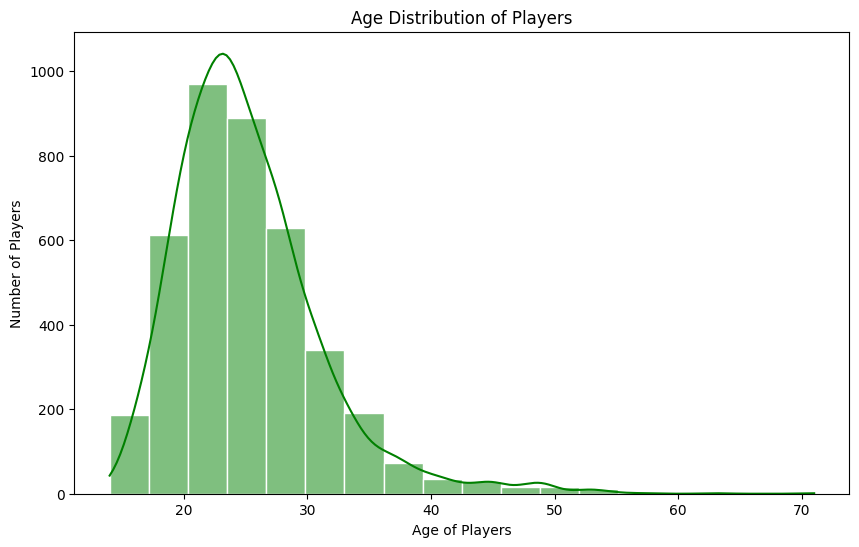

In [ ]:
#1.What is the average age of participants?
plt.figure(figsize=(10,6))
sns.histplot(df_renamed['Age'], bins=18, kde=True, color='Green', edgecolor='White')
plt.title('Age Distribution of Players')
plt.xlabel('Age of Players')
plt.ylabel('Number of Players')
plt.show()

The graph indicates that the player base for this particular dataset is concentrated in the young adult demographic, with a sharp decline in participation among older age groups.

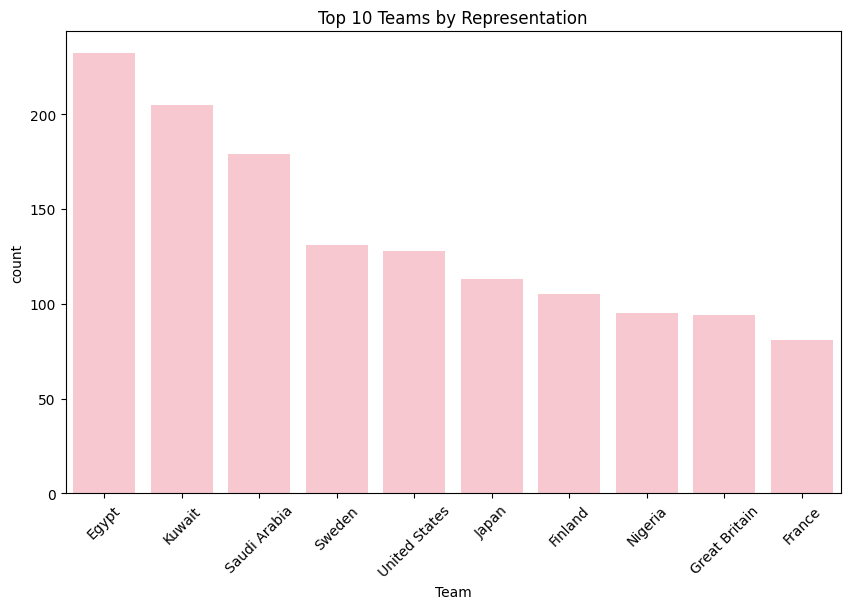

In [ ]:
#2.Which teams are most frequently represented in the dataset?
plt.figure(figsize=(10, 6))
sns.countplot(x='Team', data=df_renamed, order=df['Team'].value_counts().index[:10],color='pink')
plt.title('Top 10 Teams by Representation')
plt.xticks(rotation=45)
plt.show()

The graph indicates that among the top 10 teams, Egypt, Kuwait, and Saudi Arabia have the highest representation, while the other seven countries have lower and more comparable representation counts.

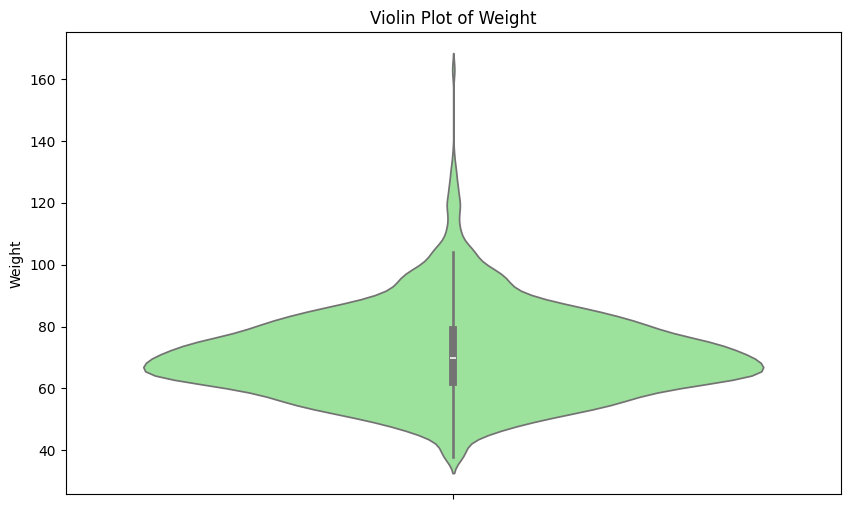

In [ ]:
#3.What is the distribution Weight column?
plt.figure(figsize=(10, 6))
sns.violinplot(y='Weight', data=df_renamed, color='lightgreen')
plt.title(f'Violin Plot of Weight')
plt.ylabel('Weight')
plt.show()

The violin plot reveals a bimodal weight distribution with a median around 100 units, indicating two distinct groups of lower and higher weights. The asymmetry and extended tails suggest non-normality and potential outliers in the dataset.

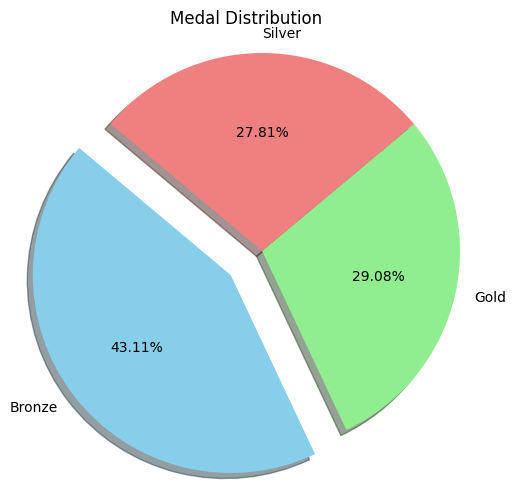

In [ ]:
#4.What is the distribution of medals (Gold, Silver, Bronze) in the dataset?
Medal_distribution = df_renamed['Medal'].value_counts()
explode=[0.2,0.0,0.0]
plt.figure(figsize=(6,6))
plt.pie(Medal_distribution, labels=Medal_distribution.index, autopct='%1.2f%%',explode=explode,
        shadow=True, startangle=140, colors=['skyblue', 'lightgreen','lightcoral'])
plt.title('Medal Distribution')
plt.axis('equal')
plt.show()

- Bronze medals constitute the largest portion, accounting for 43.11% of the total medals.
- Gold medals are the second most common, making up 29.08% of the medals.
- Silver medals are the least distributed, with 27.81% of the total.

The majority of the medals awarded are Bronze, followed by Gold, and then Silver.


**BIVARIATE ANALYSIS**

Correlation between Age and Weight: 0.187898451687603


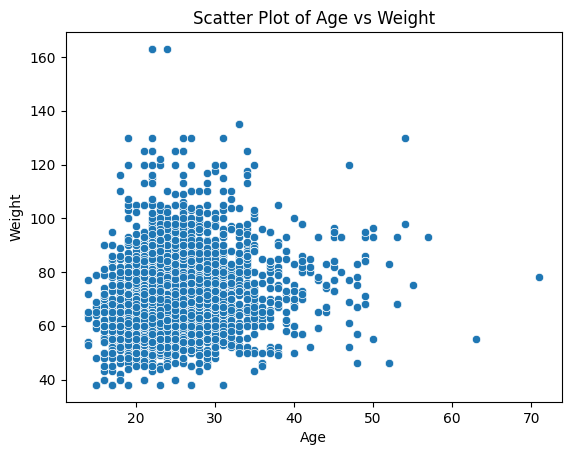

In [ ]:
#5.Is there a correlation between age and height among the athletes?
sns.scatterplot(x='Age', y='Weight', data=df_renamed)
plt.title('Scatter Plot of Age vs Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
correlation = df_renamed['Age'].corr(df_renamed['Weight'])
print(f"Correlation between Age and Weight: {correlation}")
plt.show()

The scatter plot reveals a diverse distribution of data points, with no clear linear relationship between age and weight. While there is some concentration around mid-age and mid-weight ranges, outliers and the lack of a distinct pattern suggest a complex and non-linear connection between the variables.

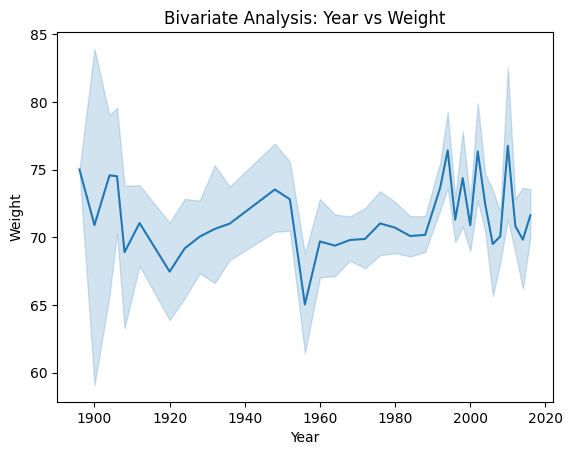

In [ ]:
#6.Do athletes typically gain or lose weight as they age?
sns.lineplot(x='Year', y='Weight', data=df_renamed)
plt.title('Bivariate Analysis: Year vs Weight')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.show()


The graph reveals a consistent century-long increase in average weight with occasional fluctuations. Recent years show heightened variability, indicating increased diversity in weight within the population.

<ipython-input-40-8c8f6d8a8290>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed,x="Season",y="Age",palette="pastel")


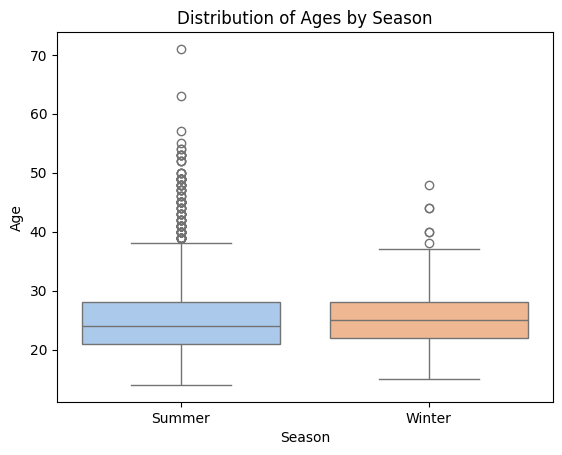

In [ ]:
#7. Are there noticeable differences in age distributions between seasons?
sns.boxplot(data=df_renamed,x="Season",y="Age",palette="pastel")
plt.title('Distribution of Ages by Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.show()

The age distribution in Summer tends to be younger and more concentrated around the median, while Winter has a broader age distribution with more significant variation and higher age outliers.

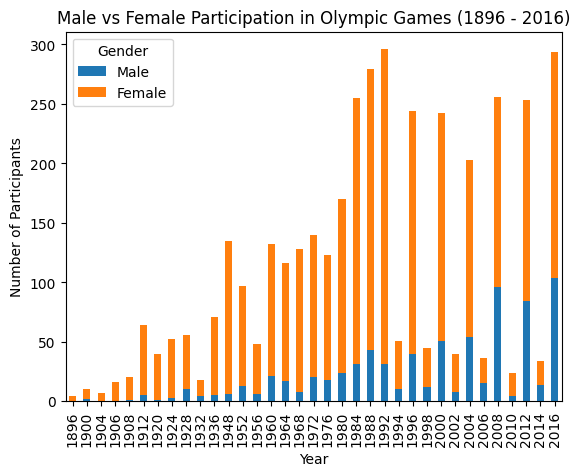

In [ ]:
#8.What insights can be derived from the plotted data about male and female participation in the Olympic Games from 1896 to 2016?
gender_participation = df_renamed.groupby(['Year', 'Gender']).size().unstack()

# Plotting the data
gender_participation.plot(kind='bar', stacked=True)
plt.title('Male vs Female Participation in Olympic Games (1896 - 2016)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.legend(title='Gender', loc='upper left', labels=['Male','Female'])
plt.show()


The bar graph reveals a consistent historical trend where male participation in the Olympic Games has consistently surpassed female involvement from 1896 to 2016. Despite a modest start, female participation has progressively risen, narrowing the gender gap over time. The graph indicates a positive trajectory towards greater gender equality, with both male and female participation showing an overall upward trend. Noteworthy fluctuations in certain years suggest external factors impacting participation dynamics.






**MULTIVARAITE ANALYSIS**

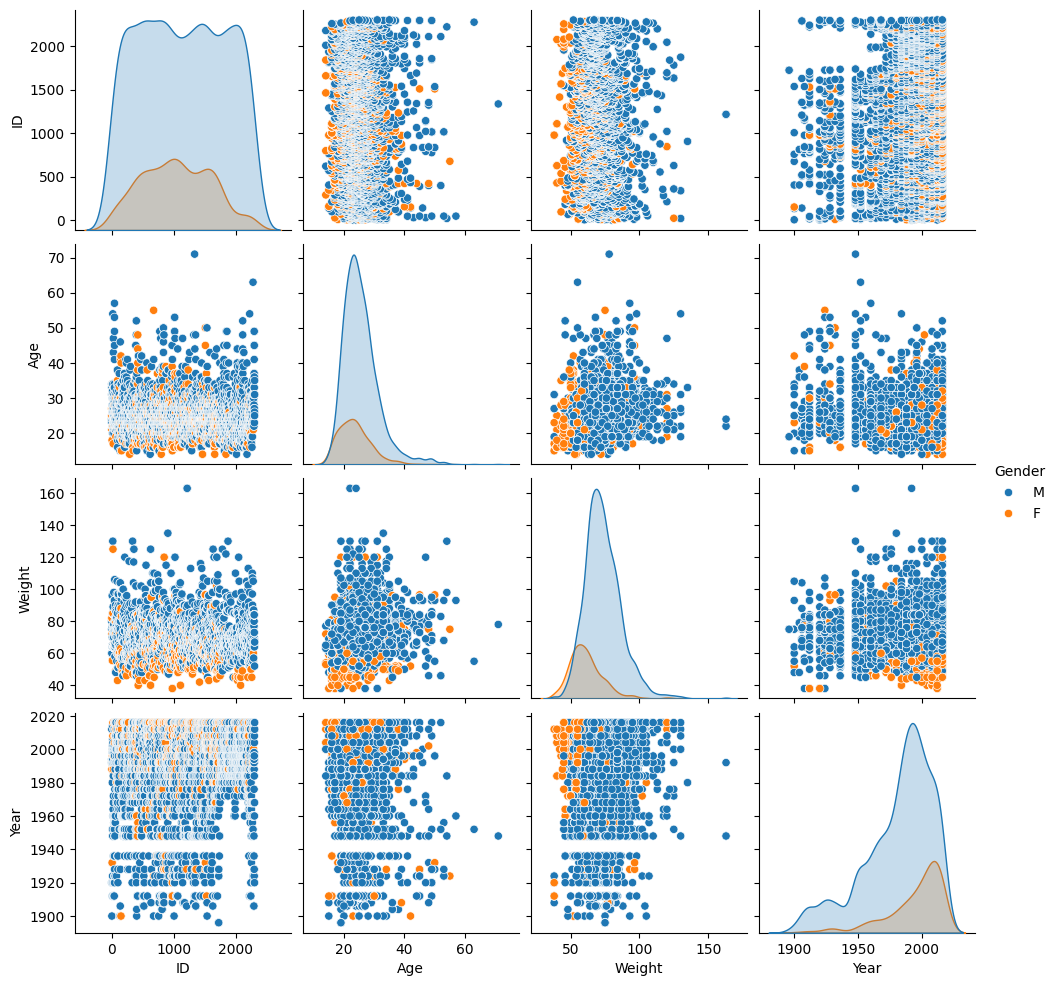

In [ ]:
#9. What patterns or trends can be observed in the pair plot, specifically regarding the 'Gender' variable?
sns.pairplot(df_renamed, hue = 'Gender')

The pair plot reveals distribution patterns and relationships within a dataset. It highlights normal distributions for Age and Weight, significant variability in Year, and differences in Age and Weight between genders. No strong correlations are observed, but outliers in Weight are noticeable. Overall, the visualization provides insights into variable distributions, gender disparities, and potential outliers in the dataset.

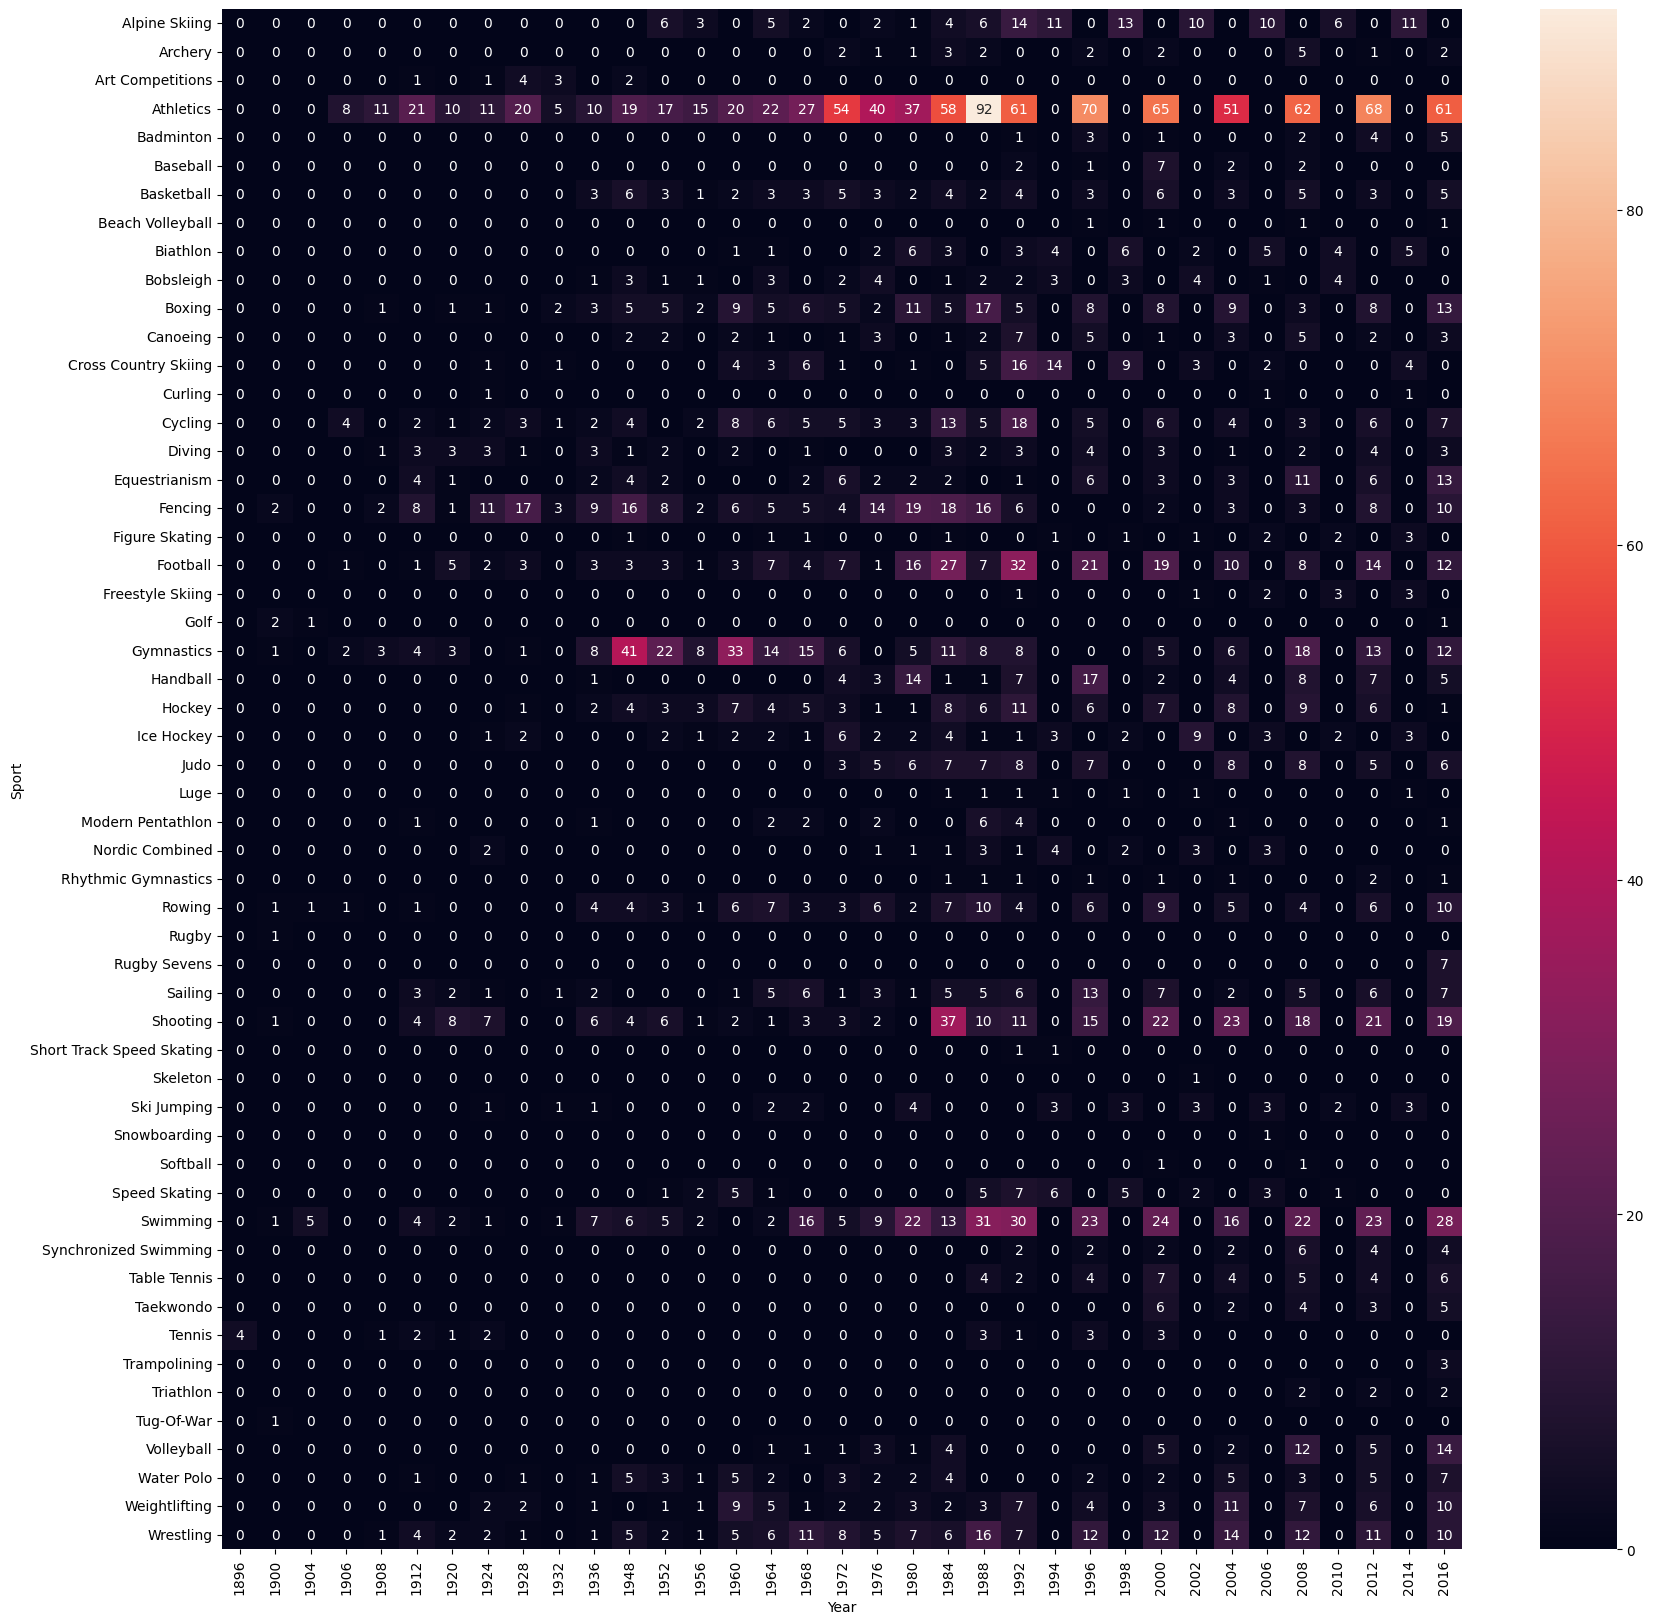

In [ ]:
#10. What does the generated heatmap reveal about the distribution of events across different sports and years?
plt.figure(figsize=(20,20))
sns.heatmap(df_renamed.pivot_table(index="Sport",columns="Year", values="Event", aggfunc="count").fillna(0).astype(int),annot=True)
plt.show()


The heatmap visually represents sports data over time, with the y-axis indicating various sports and the x-axis denoting years. Darker colors suggest higher values for a certain metric, showcasing sports with consistent excellence or participation. Conversely, lighter colors or zeros indicate less activity or lower performance. Without a legend, the specific metric remains unknown, but the heatmap effectively highlights trends and concentrations across sports and years.

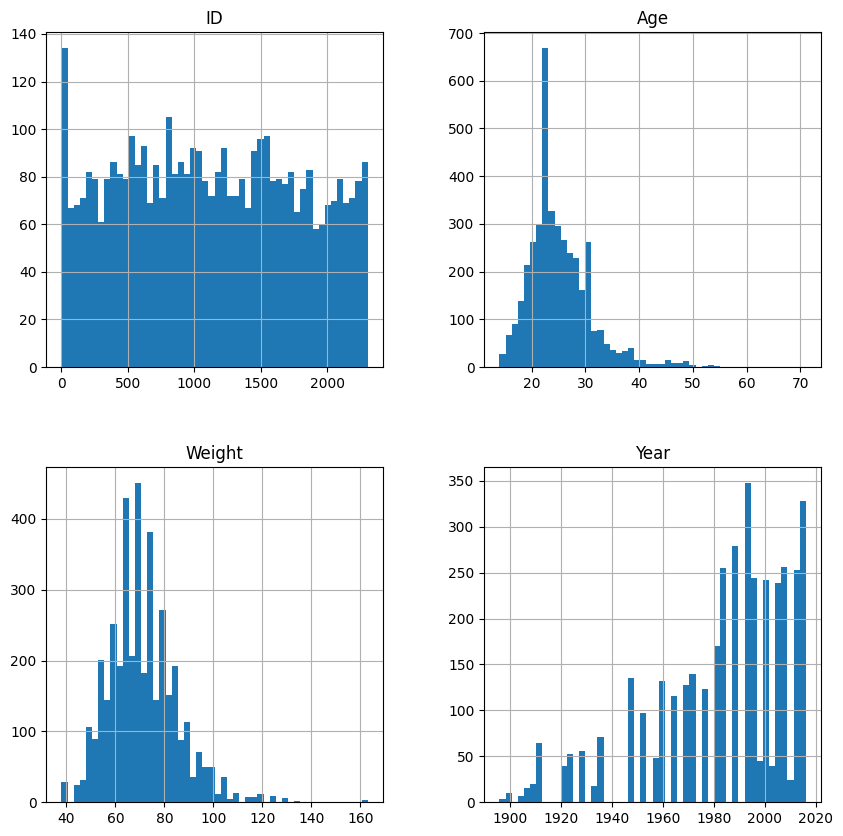

In [ ]:
#11. What information do the histograms provide about the distribution of numerical variables in the DataFrame?
df_renamed.hist(figsize=(10,10),bins=50)
plt.show()

The histograms provide an overview of the distributions of ID, Age, Weight, and Year within the dataset. The Age and Weight histograms suggest that the dataset is skewed towards younger individuals and lower weights, respectively. The Year histogram indicates that the data may be concentrated around certain periods, particularly the 1960s, with fewer entries from other years. The ID histogram does not provide much insight beyond the distribution of the dataset's entries across the ID numbers.

In [ ]:
#To save the file
df.to_csv('/content/sample_data/Olympic.csv',index=False)